Image Classification - Using Keras (tensorflow backend) 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)

2.0.0-alpha0


In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [10]:
(train_images, train_label),(test_images, test_label) = fashion_mnist.load_data()

In [13]:
train_label


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
train_images.shape

(60000, 28, 28)

In [16]:
test_images.shape

(10000, 28, 28)

In [18]:
len(train_label)

60000

In [19]:
len(test_label)

10000

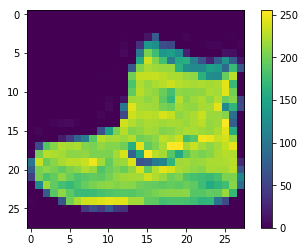

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [25]:
#Scaling
train_images = train_images/255
test_images = test_images/255

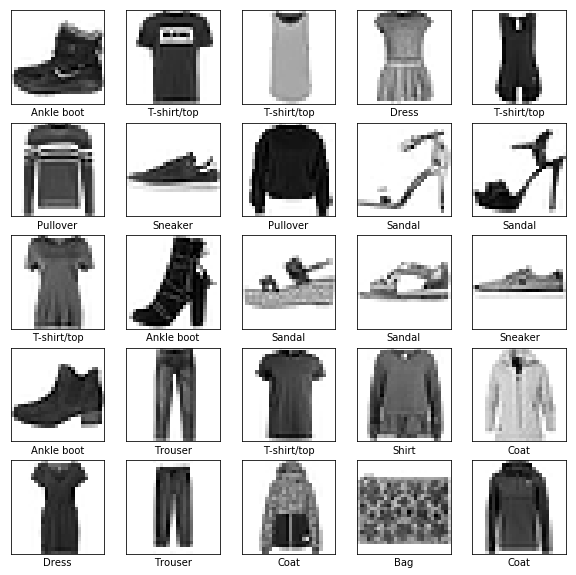

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_label[i]])
plt.show()

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation ="softmax")
])

In [33]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [35]:
model.fit(train_images, train_label, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4954 - accuracy: 0.8266
Epoch 2/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3754 - accuracy: 0.8645
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3372 - accuracy: 0.8780
Epoch 4/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3130 - accuracy: 0.8854
Epoch 5/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2956 - accuracy: 0.8903


In [36]:
test_loss, test_acc = model.evaluate(test_images, test_label)

10000/10000 [==============================] - 0s 47us/sample - loss: 0.3389 - accuracy: 0.8798


In [37]:
predictions = model.predict(test_images)

In [38]:
predictions[0]

array([1.35189714e-06, 3.19563709e-09, 6.00737451e-08, 3.16390114e-08,
       1.08604105e-07, 1.22419158e-02, 1.09135965e-06, 3.03651169e-02,
       3.88803159e-07, 9.57389891e-01], dtype=float32)

In [39]:
np.argmax(predictions[0])

9

In [41]:
test_label[0]

9

In [66]:
def plot_image(i, predicted_array, true_label, img):
    predicted_array, true_label, img = predicted_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predicted_array)
    if predicted_label==true_label:
        color= 'blue'
    else:
        color='red'
    
    plt.xlabel("{} {:2.0f} {}" .format(class_names[predicted_label],
                                      100*np.max(predicted_array),
                                      class_names[true_label]), 
              color=color)
        
    
    

In [67]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    



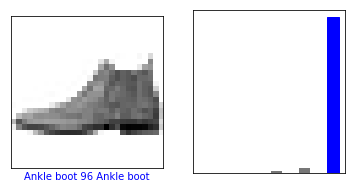

In [68]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_label, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_label)
plt.show()

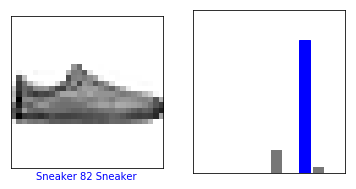

In [69]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_label, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_label)
plt.show()

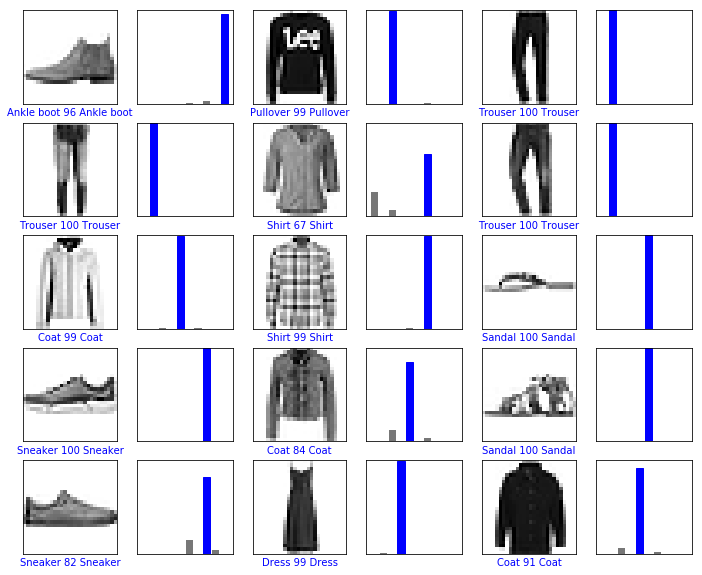

In [70]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_label, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_label)
plt.show()

In [71]:
## making prediction on single image

img = test_images[0]

In [72]:
print(img.shape)

(28, 28)


In [73]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

In [74]:
print(img.shape)

(1, 28, 28)


In [75]:
predictions_single = model.predict(img)

In [76]:
predictions_single

array([[1.35189714e-06, 3.19564308e-09, 6.00738588e-08, 3.16391926e-08,
        1.08604105e-07, 1.22419270e-02, 1.09135965e-06, 3.03651448e-02,
        3.88804608e-07, 9.57389891e-01]], dtype=float32)

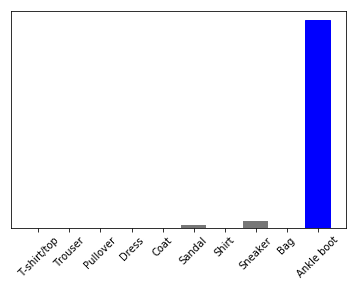

In [83]:
plot_value_array(0, predictions_single, test_label)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [84]:
np.argmax(predictions_single)

9